# Машинное обучение, DS-поток, осень 2022
## Задание 3.8


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 60 баллов;
* Задача 2 &mdash; 100 баллов;
* Задача 3 &mdash; 30 баллов + бонусы.

## Теория

### Задача 1

В модели XGBoost запишите задачу оптимизации при построении нового дерева, критерий информативности и оптимальные ответы в листьях в следующих случаях.
1. Задача регрессии, квадратичная функция потерь $L(y, z) = (y - z)^2$.
2. Задача классификации, экспоненциальная функция потерь $L(y, z) = e^{-yz}$.
3. Задача классификации, логистическая функция потерь $L(y, z) = \ln(1 + e^{-yz})$.

В задачах классификации классификатор предсказывает степень уверенности принадлежности классу из $\mathscr{Y} \in \{-1, +1\}$. Решающее правило имеет вид $f(x) = \mathrm{sign} \widehat{y}(x)$.

## Практика

### Задача 2

В файле `houses_train.csv` представлен набор данных про квартиры в городе Сиэтл, штат Вашингтон. Задача — предсказать цену на жилье по имеющимся данным.

Данные имеют следующие столбцы:
* `id` — идентификационный номер жилья
* `date` — дата продажи дома
* `price` — цена
* `bedrooms` — количество спален
* `bathrooms` — количество ванных комнат, где .5 означает комнату с туалетом, но без душа
* `sqft_living` — площадь жилья
* `sqft_lot` — площадь участка
* `floors` — количество этажей
* `waterfront` — видна ли набережная
* `view` — насколько хороший вид
* `condition` — индекс от 1 от 5, отвечающий за состояние квартиры
* `grade` — 1 до 13, 1-3 соответствует плохому уровню строительства и дизайна, 3-7 — средний уровень, 11-13 — высокий.
* `sqft_above` — жилая площадь над уровнем земли
* `sqft_basement` — жилая площадь под уровнем земли
* `yr_built` — год постройки жилья
* `yr_renovated` — год последней реконструкции жилья
* `zipcode` — почтовый индекс
* `lat` — широта
* `long` — долгота
* `sqft_living15` — средняя площадь жилья ближайших 15-и соседей
* `sqft_lot15` — средняя площадь участка ближайших 15-и соседей

Исследуйте зависимость качества по метрике MAPE для моделей XGBoost, LightGBM, CatBoost, а так же градиентного бустинга из sklearn, в зависимости от количества деревьев, их максимальной глубины, шага обучения, l1 и l2 регуляризаций. При исследовании одного гиперпараметра рисуйте один график для всех моделей. Тщательно подберите цвета и тип линий, масштаб осей так, чтобы картинка была легко читаемой. При проведении исследований не забывайте писать подробные комментариии и выводы.

*Советы.*
* Используйте код с семинаров.
* Пока мы не умеем работать с признаком `zipcode`, удалите его из данных.

*Замечания.*
* Не забывайте, что для некоторых параметров стоит генерировать сетку значений при помощи `np.logspace`.

In [2]:
import warnings
from collections import Counter

import numpy as np
import pandas as pd
import scipy.stats as sps
import seaborn as sns

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import sklearn.metrics
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold
from sklearn.metrics import (
    confusion_matrix, mean_squared_error, roc_auc_score
)
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split

import lightgbm as lgb

import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier, DMatrix

from catboost import CatBoostRegressor, Pool, CatBoostClassifier

warnings.filterwarnings('ignore')

In [3]:
data_train = pd.read_csv('houses_train.csv', parse_dates=[1])
data_test = pd.read_csv('houses_test.csv', parse_dates=[1])

In [573]:
data_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3392,2015-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,18295,2015-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,14569,2015-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
3,14081,2016-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
4,6725,2015-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [574]:
data_test

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15906,2016-04-29,2,1.00,790,9784,1.0,0,0,3,6,790,0,1932,0,98155,47.7634,-122.284,2350,10102
1,6872,2015-05-28,4,2.25,2410,4560,2.0,0,2,5,9,1800,610,1929,0,98117,47.6796,-122.402,2150,5100
2,634,2015-10-30,3,1.00,860,6664,1.0,0,0,3,6,860,0,1944,0,98178,47.4931,-122.247,1150,6857
3,18094,2015-06-17,3,1.00,980,7200,1.0,0,0,4,7,980,0,1950,0,98116,47.5718,-122.395,1180,6572
4,15811,2015-12-31,2,1.50,1556,20000,1.0,0,0,4,7,1556,0,1957,0,98032,47.3891,-122.282,2250,17286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,8571,2016-03-23,4,2.50,2570,27972,2.0,0,0,3,8,2570,0,1997,0,98053,47.6343,-121.969,2500,29761
6996,20725,2015-07-03,4,2.50,3150,4203,2.0,0,0,3,9,3150,0,2002,0,98033,47.6880,-122.164,3150,5169
6997,19631,2015-05-13,5,4.75,3830,35000,1.0,0,0,3,8,2130,1700,1976,0,98077,47.7597,-122.079,2750,36150
6998,17970,2016-04-21,3,2.50,2570,5000,2.0,0,0,3,11,2570,0,1984,0,98102,47.6295,-122.320,1570,5000


Сделаем два новых столбца используя столбец с датой, годом постройки и годом реновации. В них будут записаны сколько лет прошло перед покупкой с момента постройки дома и аналогично с момента ренновации дома. (оставили только год, тк признаки yr_built и yr_renovated содержат только год).

In [5]:
data_train['date'] = data_train['date'].apply(lambda x: x.year)
data_test['date'] = data_test['date'].apply(lambda x: x.year)

In [6]:
data_train['timef_built'] = data_train['date'] - data_train['yr_built']

data_train['yr_renovated'] = list(map(lambda x: data_train['yr_built'][x] if data_train['yr_renovated'][x] == 0 \
                                      else data_train['yr_renovated'][x], np.arange(0, len(data_train['date']))))
data_train['timef_renovated'] = data_train['date'] - data_train['yr_renovated']

In [7]:
data_test['timef_built'] = data_test['date'] - data_test['yr_built']

data_test['yr_renovated'] = list(map(lambda x: data_test['yr_built'][x] if data_test['yr_renovated'][x] == 0 \
                                      else data_test['yr_renovated'][x], np.arange(0, len(data_test['date']))))
data_test['timef_renovated'] = data_test['date'] - data_test['yr_renovated']

In [8]:
train_names = ['timef_built', 'timef_renovated', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
            'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
test_name = 'price'

X_train_start = data_train[train_names].to_numpy()
y_train_start = data_train[test_name].to_numpy()

X_test_start = data_test[train_names].to_numpy()

In [9]:
data_train.isnull().mean()

id                 0.0
date               0.0
price              0.0
bedrooms           0.0
bathrooms          0.0
sqft_living        0.0
sqft_lot           0.0
floors             0.0
waterfront         0.0
view               0.0
condition          0.0
grade              0.0
sqft_above         0.0
sqft_basement      0.0
yr_built           0.0
yr_renovated       0.0
zipcode            0.0
lat                0.0
long               0.0
sqft_living15      0.0
sqft_lot15         0.0
timef_built        0.0
timef_renovated    0.0
dtype: float64

Проверили есть ли выбросы и их не оказалось.

In [10]:
#X_train, X_test, y_train, y_test = train_test_split(X_train_start, y_train_start, test_size=0.25, random_state=45)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data_train[train_names], data_train[test_name],
                                                    test_size=0.25, random_state=45)

Посмотрим на гистограммы и избавимся от выбросов.

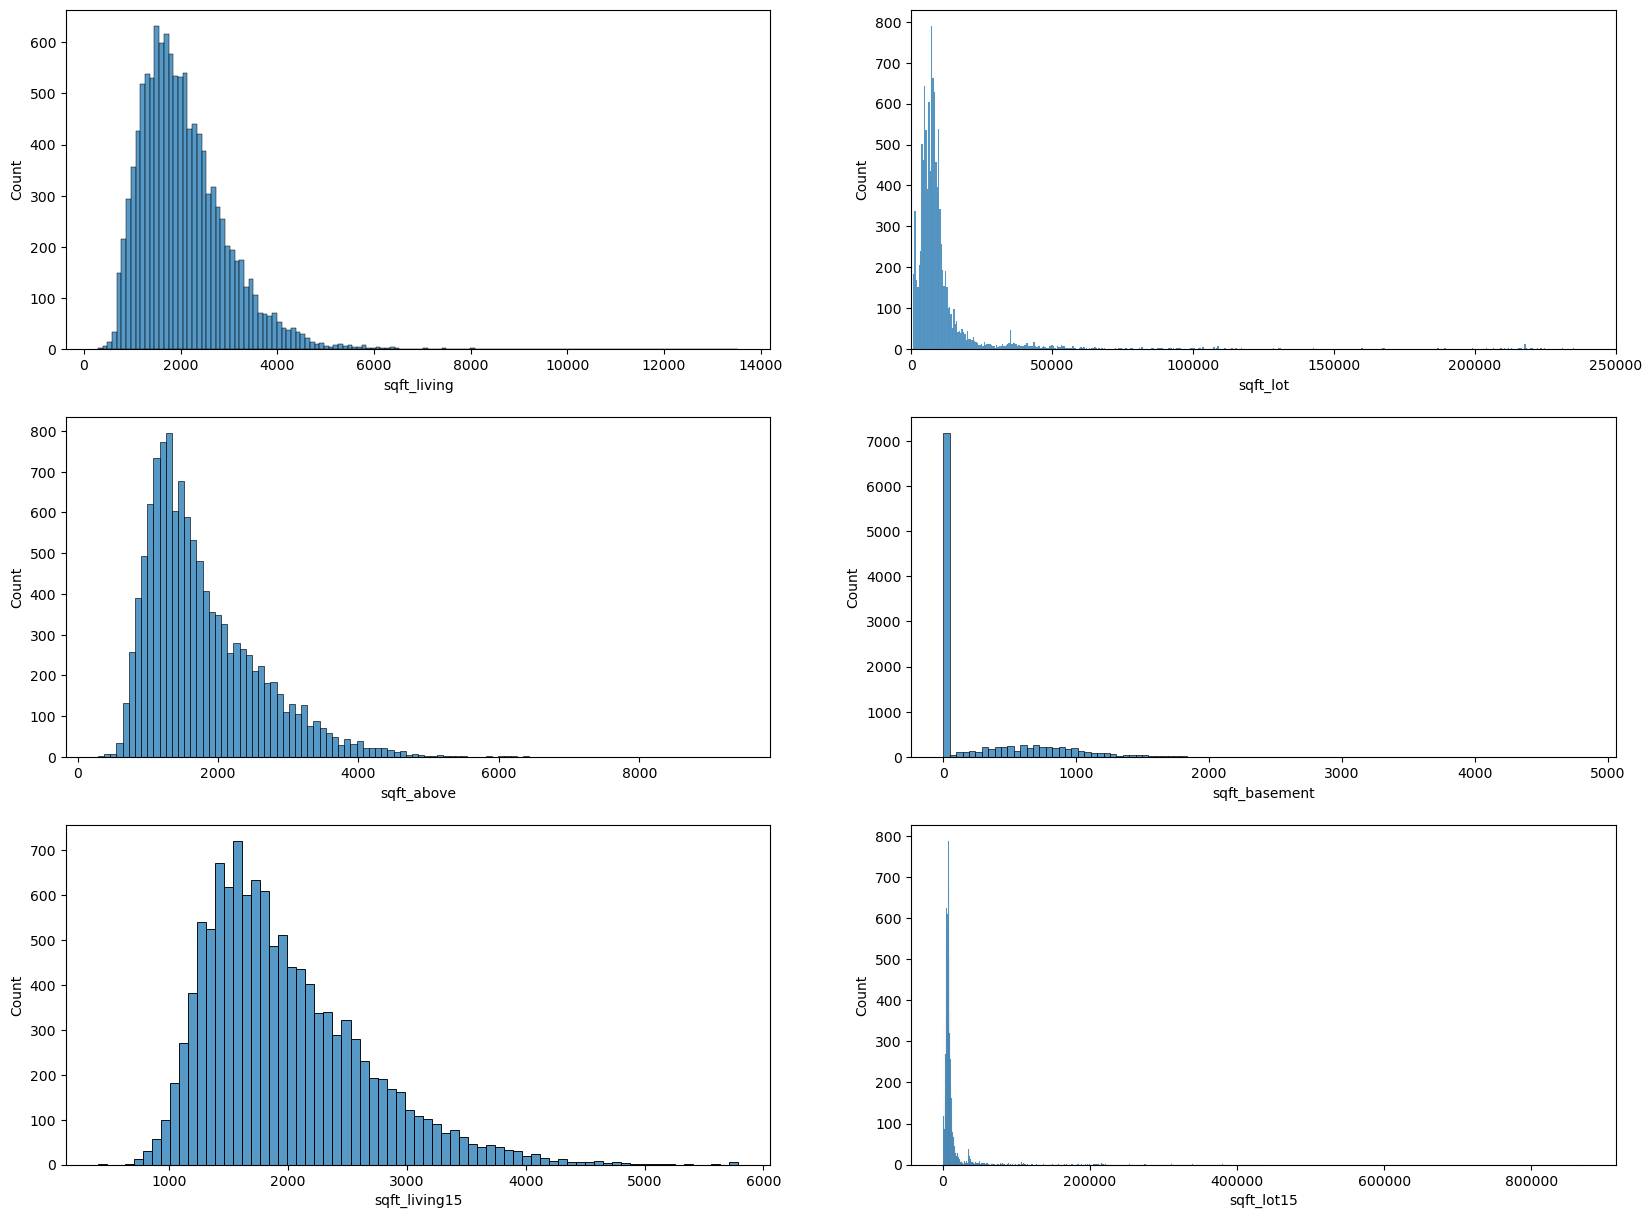

In [581]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 2, 1)
sns.histplot(X_train['sqft_living'])

plt.subplot(3, 2, 2)
sns.histplot(X_train['sqft_lot'])
plt.xlim(0, 0.25*10**6)

plt.subplot(3, 2, 3)
sns.histplot(X_train['sqft_above'])

plt.subplot(3, 2, 4)
sns.histplot(X_train['sqft_basement'])

plt.subplot(3, 2, 5)
sns.histplot(X_train['sqft_living15'])

plt.subplot(3, 2, 6)
sns.histplot(X_train['sqft_lot15']);

In [582]:
y_train = y_train[X_train['sqft_living'] < 6000]
X_train = X_train[X_train['sqft_living'] < 6000]

y_train = y_train[X_train['sqft_lot'] < 50000]
X_train = X_train[X_train['sqft_lot'] < 50000]

y_train = y_train[X_train['sqft_above'] < 5000]
X_train = X_train[X_train['sqft_above'] < 5000]

y_train = y_train[X_train['sqft_basement'] < 1500]
X_train = X_train[X_train['sqft_basement'] < 1500]

y_train = y_train[X_train['sqft_living15'] < 5000]
X_train = X_train[X_train['sqft_living15'] < 5000]

y_train = y_train[X_train['sqft_lot15'] < 50000]
X_train = X_train[X_train['sqft_lot15'] < 50000]

Посмотрим на зависимость цены, широты и долготы между собой. На графиках с ценой видно, что есть выбросы, но когда я их убирал точность получалась хуже, поэтому оставим их.

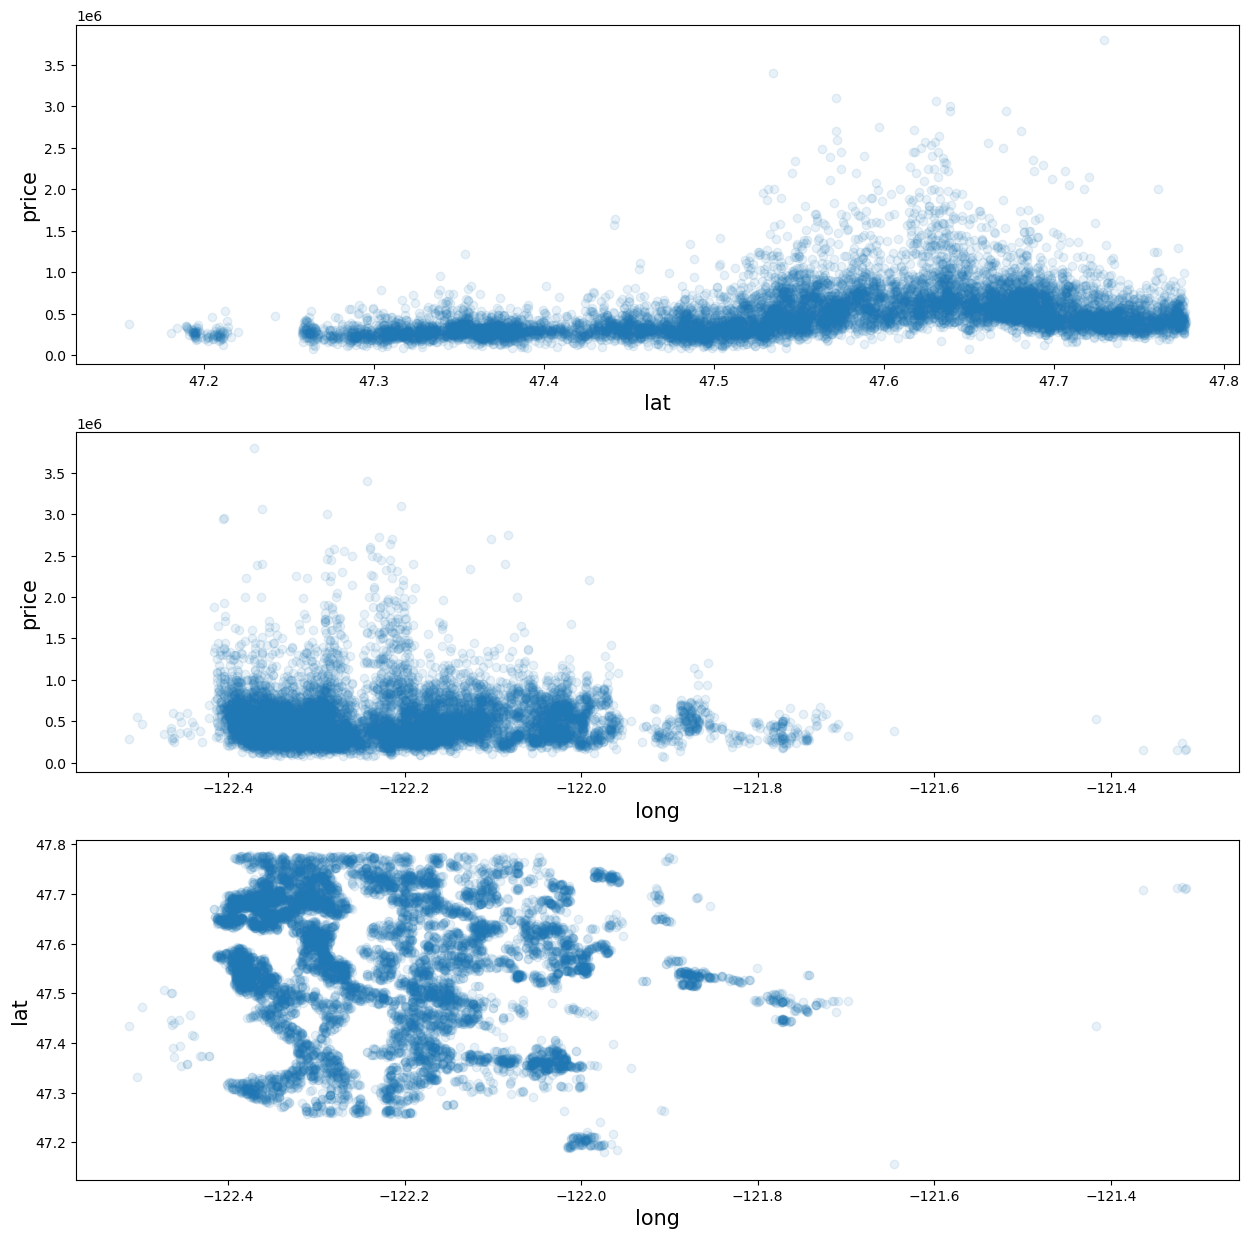

In [583]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 1)
plt.scatter(X_train['lat'], y_train, alpha=0.1)
plt.xlabel('lat', fontsize=15)
plt.ylabel('price', fontsize=15)

plt.subplot(3, 1, 2)
plt.scatter(X_train['long'], y_train, alpha=0.1)
plt.xlabel('long', fontsize=15)
plt.ylabel('price', fontsize=15);

plt.subplot(3, 1, 3)
plt.scatter(X_train['long'], X_train['lat'], alpha=0.1)
plt.xlabel('long', fontsize=15)
plt.ylabel('lat', fontsize=15);

In [758]:
#X_train = X_train[y_train < 1.75*10**6]
#y_train = y_train[y_train < 1.75*10**6]

Начнем обучение. Сначала воспользуемся XGBoost и найдем оптимальные гиперпараметры с точки зрения MAPE.

In [585]:
model_xgb = xgb.XGBRegressor(eval_metric='mape', random_state=25)
model_xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'mape',
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 25,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [586]:
parameters_grid = {
    'n_estimators' : np.arange(50, 500, 10),
    'max_depth' : range(1, 15, 1),
    'lambda' : sps.expon(loc=0, scale=1),
    'alpha' : sps.expon(loc=0, scale=1),
    'learning_rate' : np.linspace(0.001, 1, 1000)
}

In [587]:
# задаем стратегию кросс-валидации
ss = StratifiedKFold(n_splits=5)

# определяем поиск по сетке 
gs_xgboost = RandomizedSearchCV(
    # модель для обучения, в нашем случае XGBoostClassifier
    estimator=model_xgb,
    # количество итераций поиска 
    n_iter=100,
    # сетка значений гиперпараметров
    param_distributions=parameters_grid,
    # метрика качества, берем accuracy
    scoring='neg_mean_absolute_percentage_error',
    # GridSearch отлично параллелится, но и XGBoost параллелится
    n_jobs=-2,  
    # стратегия кросс-валидации
    cv=ss,  
     # сообщения с логами обучения: больше значение - больше сообщений
    verbose=1, 
    # значение, присваиваемое scorer в случае ошибки при обучении
    error_score='raise',
    # seed для генератора случайных чисел
    random_state=25
)

In [588]:
gs_xgboost.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='mape', gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          imp...
       0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999,
       1.   ]),
                                        'max_depth': range(1, 15),
                                        'n_estimators': array

Найдем лучшие параметры и посчитаем ошибку.

In [589]:
gs_xgboost.best_params_

{'alpha': 0.26752756929794896,
 'lambda': 0.16952352139734025,
 'learning_rate': 0.084,
 'max_depth': 7,
 'n_estimators': 360}

In [747]:
print('MAPE на train:', mean_absolute_percentage_error(y_train, gs_xgboost.predict(X_train)))
print('MAPE на test:', mean_absolute_percentage_error(y_test, gs_xgboost.predict(X_test)))

MAPE на train: 0.05924782181751131
MAPE на test: 0.1318054970560062


In [613]:
xgb_best_alpha = gs_xgboost.best_params_['alpha']
xgb_best_lambda = gs_xgboost.best_params_['lambda']
xgb_best_learning_rate = gs_xgboost.best_params_['learning_rate']
xgb_best_max_depth = gs_xgboost.best_params_['max_depth']
xgb_best_n_estimators = gs_xgboost.best_params_['n_estimators']

Аналогично проделаем с остальными моделями.

In [591]:
model_lgbm = lgb.LGBMRegressor(random_state=25)
model_lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 25,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [592]:
parameters_grid = {
    'n_estimators' : np.arange(50, 500, 10),
    'max_depth' : range(1, 15, 1),
    'reg_alpha' : sps.expon(loc=0, scale=1),
    'reg_lambda' : sps.expon(loc=0, scale=1),
    'learning_rate' : np.linspace(0.001, 1, 1000)
}

In [593]:
ss = StratifiedKFold(n_splits=5)

# определяем поиск по сетке 
gs_lgbm = RandomizedSearchCV(
    # модель для обучения, в нашем случае XGBoostClassifier
    estimator=model_lgbm,
    # количество итераций поиска 
    n_iter=200,
    # сетка значений гиперпараметров
    param_distributions=parameters_grid,
    # метрика качества, берем accuracy
    scoring='neg_mean_absolute_percentage_error',
    # GridSearch отлично параллелится, но и XGBoost параллелится
    n_jobs=-2,  
    # стратегия кросс-валидации
    cv=ss,  
     # сообщения с логами обучения: больше значение - больше сообщений
    verbose=1, 
    # значение, присваиваемое scorer в случае ошибки при обучении
    error_score='raise',
    # seed для генератора случайных чисел
    random_state=25
)

In [594]:
gs_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise',
                   estimator=LGBMRegressor(random_state=25), n_iter=200,
                   n_jobs=-2,
                   param_distributions={'learning_rate': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024,...
       180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300,
       310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430,
       440, 450, 460, 470, 480, 490]),
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fdf25c208b0>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fdea20de550>},
                   random_state=25,
                   scoring='ne

In [595]:
gs_lgbm.best_params_

{'learning_rate': 0.051000000000000004,
 'max_depth': 14,
 'n_estimators': 370,
 'reg_alpha': 1.8470715048355992,
 'reg_lambda': 0.19480578110742378}

In [746]:
print('MAPE на train:', mean_absolute_percentage_error(y_train, gs_lgbm.predict(X_train)))
print('MAPE на test:', mean_absolute_percentage_error(y_test, gs_lgbm.predict(X_test)))

MAPE на train: 0.09535746795810296
MAPE на test: 0.12732810797442606


In [632]:
lgbm_best_alpha = gs_lgbm.best_params_['reg_alpha']
lgbm_best_lambda = gs_lgbm.best_params_['reg_lambda']
lgbm_best_learning_rate = gs_lgbm.best_params_['learning_rate']
lgbm_best_max_depth = gs_lgbm.best_params_['max_depth']
lgbm_best_n_estimators = gs_lgbm.best_params_['n_estimators']

In [619]:
model_cb = CatBoostRegressor(eval_metric='MAPE', random_strength=1, random_state=25, one_hot_max_size=2)
model_cb.get_params()

{'loss_function': 'RMSE',
 'one_hot_max_size': 2,
 'random_strength': 1,
 'eval_metric': 'MAPE',
 'random_state': 25}

In [620]:
parameters_grid = {
    'n_estimators' : np.arange(50, 500, 10),
    'max_depth' : range(1, 15, 1),
    'l2_leaf_reg' : sps.expon(loc=0, scale=1),
    'eta' : np.linspace(0.001, 1, 1000)
}

In [621]:
ss = StratifiedKFold(n_splits=5)

# определяем поиск по сетке 
gs_cb = RandomizedSearchCV(
    # модель для обучения, в нашем случае XGBoostClassifier
    estimator=model_cb,
    # количество итераций поиска 
    n_iter=100,
    # сетка значений гиперпараметров
    param_distributions=parameters_grid,
    # метрика качества, берем accuracy
    scoring='neg_mean_absolute_percentage_error',
    # GridSearch отлично параллелится, но и XGBoost параллелится
    n_jobs=-2,  
    # стратегия кросс-валидации
    cv=ss,  
     # сообщения с логами обучения: больше значение - больше сообщений
    verbose=1, 
    # значение, присваиваемое scorer в случае ошибки при обучении
    error_score='raise',
    # seed для генератора случайных чисел
    random_state=25
)

In [622]:
gs_cb.fit(X_train, y_train, verbose=False)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise',
                   estimator=<catboost.core.CatBoostRegressor object at 0x7fdf03524940>,
                   n_iter=100, n_jobs=-2,
                   param_distributions={'eta': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.0...
                                        'l2_leaf_reg': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fdf035249a0>,
                                        'max_depth': range(1, 15),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300,
       310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430,
       440, 450, 460, 470, 480, 490])},
     

In [623]:
gs_cb.best_params_

{'eta': 0.109,
 'l2_leaf_reg': 1.0490372157062318,
 'max_depth': 9,
 'n_estimators': 430}

In [745]:
print('MAPE на train:', mean_absolute_percentage_error(y_train, gs_cb.predict(X_train)))
print('MAPE на test:', mean_absolute_percentage_error(y_test, gs_cb.predict(X_test)))

MAPE на train: 0.07310557641258086
MAPE на test: 0.1242570293042425


In [633]:
cb_best_lambda = gs_cb.best_params_['l2_leaf_reg']
cb_best_learning_rate = gs_cb.best_params_['eta']
cb_best_max_depth = gs_cb.best_params_['max_depth']
cb_best_n_estimators = gs_cb.best_params_['n_estimators']

In [625]:
model_gb = GradientBoostingRegressor(random_state=25)
model_gb.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 25,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [626]:
parameters_grid = {
        'learning_rate': np.linspace(0.05, 1, 1000),
        'n_estimators': np.arange(50, 500, 50),
        'max_depth': np.arange(3, 11)
}

In [627]:
ss = StratifiedKFold(n_splits=5)

# определяем поиск по сетке 
gs_gb = RandomizedSearchCV(
    # модель для обучения, в нашем случае XGBoostClassifier
    estimator=model_gb,
    # количество итераций поиска 
    n_iter=100,
    # сетка значений гиперпараметров
    param_distributions=parameters_grid,
    # метрика качества, берем accuracy
    scoring='neg_mean_absolute_percentage_error',
    # GridSearch отлично параллелится, но и XGBoost параллелится
    n_jobs=-2,  
    # стратегия кросс-валидации
    cv=ss,  
     # сообщения с логами обучения: больше значение - больше сообщений
    verbose=1, 
    # значение, присваиваемое scorer в случае ошибки при обучении
    error_score='raise',
    # seed для генератора случайных чисел
    random_state=25
)

In [628]:
gs_gb.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise',
                   estimator=GradientBoostingRegressor(random_state=25),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'learning_rate': array([0.05      , 0.05095095, 0.0519019 , 0.05285285, 0.0538038 ,
       0.05475475, 0.05570571, 0.05665666, 0.05760761, 0.05855856,
       0.05950951, 0.06046046, 0.0614...
       0.98193193, 0.98288288, 0.98383383, 0.98478478, 0.98573574,
       0.98668669, 0.98763764, 0.98858859, 0.98953954, 0.99049049,
       0.99144144, 0.99239239, 0.99334334, 0.99429429, 0.99524525,
       0.9961962 , 0.99714715, 0.9980981 , 0.99904905, 1.        ]),
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=25,
                 

In [629]:
gs_gb.best_params_

{'n_estimators': 250, 'max_depth': 6, 'learning_rate': 0.12227227227227228}

In [748]:
print('MAPE на train:', mean_absolute_percentage_error(y_train, gs_gb.predict(X_train)))
print('MAPE на test:', mean_absolute_percentage_error(y_test, gs_gb.predict(X_test)))

MAPE на train: 0.07510166017326451
MAPE на test: 0.13214287152480017


In [634]:
gb_best_learning_rate = gs_gb.best_params_['learning_rate']
gb_best_max_depth = gs_gb.best_params_['max_depth']
gb_best_n_estimators = gs_gb.best_params_['n_estimators']

Из всех полученных моделей лучше всего оказалась CatBoost, так как дала саму маленькую ошибку на тестовой выборке, а хуже всего - обычный градиентный бустинг. Сейчас посмотрим на зависимость гиперпараметров от MAPE.

In [749]:
max_depth_xgb = []
max_depth_lgbm = []
max_depth_cb = []
max_depth_gb = []

max_depth_values = np.arange(1, 15)
for depth in tqdm(max_depth_values):
    
    model_xgb = xgb.XGBRegressor(n_estimators=xgb_best_n_estimators, max_depth=depth, 
                                 reg_alpha=xgb_best_alpha, reg_lambda=xgb_best_lambda,
                                 learning_rate=xgb_best_learning_rate, random_state=25)
    model_xgb.fit(X_train, y_train)
    
    model_lgbm = lgb.LGBMRegressor(n_estimators=lgbm_best_n_estimators, max_depth=depth, 
                                 reg_alpha=lgbm_best_alpha, reg_lambda=lgbm_best_lambda,
                                 learning_rate=lgbm_best_learning_rate, random_state=25)
    model_lgbm.fit(X_train, y_train)
    
    model_cb = CatBoostRegressor(n_estimators=cb_best_n_estimators, max_depth=depth, 
                                 l2_leaf_reg=cb_best_lambda, learning_rate=cb_best_learning_rate,
                                 random_state=25)
    model_cb.fit(X_train, y_train, verbose=False)
    
    model_gb = GradientBoostingRegressor(n_estimators=gb_best_n_estimators, max_depth=depth, 
                                 learning_rate=gb_best_learning_rate, random_state=25)
    model_gb.fit(X_train, y_train)
    
    max_depth_xgb.append(mean_absolute_percentage_error(y_test, model_xgb.predict(X_test)))
    max_depth_lgbm.append(mean_absolute_percentage_error(y_test, model_lgbm.predict(X_test)))
    max_depth_cb.append(mean_absolute_percentage_error(y_test, model_cb.predict(X_test)))
    max_depth_gb.append(mean_absolute_percentage_error(y_test, model_gb.predict(X_test)))

  0%|          | 0/14 [00:00<?, ?it/s]

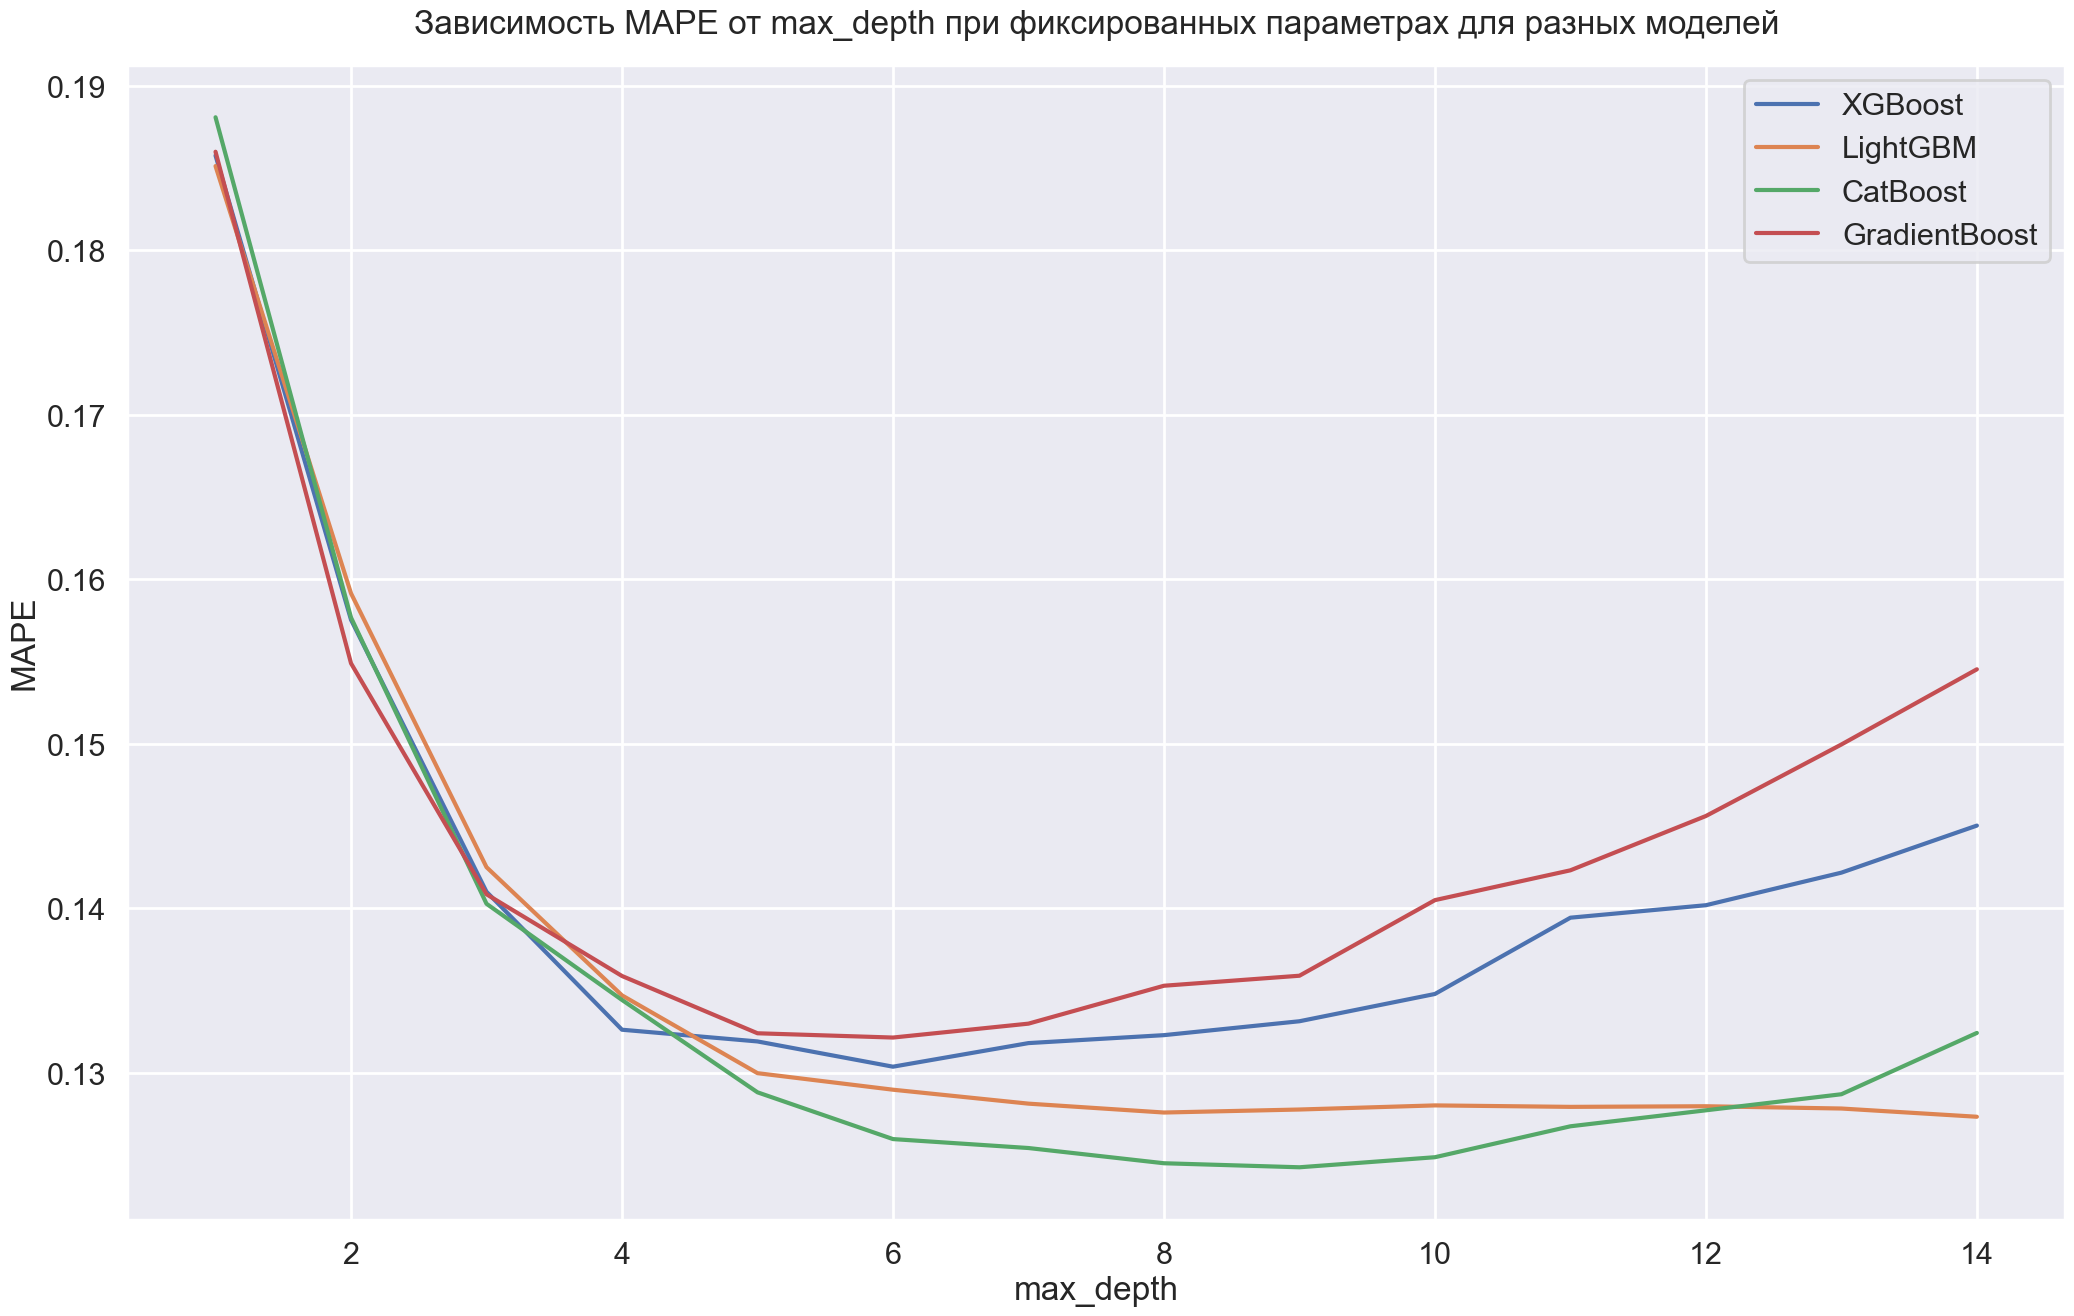

In [750]:
plt.figure(figsize=(25, 15))
sns.set(context='poster')

plt.plot(max_depth_values, max_depth_xgb, label='XGBoost')
plt.plot(max_depth_values, max_depth_lgbm, label='LightGBM')
plt.plot(max_depth_values, max_depth_cb, label='CatBoost')
plt.plot(max_depth_values, max_depth_gb, label='GradientBoost')

plt.xlabel('max_depth')
plt.ylabel('MAPE')
plt.title('Зависимость MAPE от max_depth при фиксированных параметрах для разных моделей', y=1.02)
plt.legend();

На графике видно, что при глубине больше 6 у GradientBoost и XGBoost происходит переобучение и ошибка ухудшается. Лучше всего себя ведет график CatBoost и LightGBM: сначала лушче первый, но при глубине боль 12 - второй.

In [645]:
learning_rate_xgb = []
learning_rate_lgbm = []
learning_rate_cb = []
learning_rate_gb = []

learning_rate_values = np.linspace(0.05, 0.5, 50)
for rate in learning_rate_values:
    
    model_xgb = xgb.XGBRegressor(n_estimators=xgb_best_n_estimators, max_depth=xgb_best_max_depth, 
                                 reg_alpha=xgb_best_alpha, reg_lambda=xgb_best_lambda,
                                 learning_rate=rate, random_state=25)
    model_xgb.fit(X_train, y_train)
    
    model_lgbm = lgb.LGBMRegressor(n_estimators=lgbm_best_n_estimators, max_depth=lgbm_best_max_depth, 
                                 reg_alpha=lgbm_best_alpha, reg_lambda=lgbm_best_lambda,
                                 learning_rate=rate, random_state=25)
    model_lgbm.fit(X_train, y_train)
    
    model_cb = CatBoostRegressor(n_estimators=cb_best_n_estimators, max_depth=cb_best_max_depth, 
                                 l2_leaf_reg=cb_best_lambda, learning_rate=rate,
                                 random_state=25)
    model_cb.fit(X_train, y_train, verbose=False)
    
    model_gb = GradientBoostingRegressor(n_estimators=gb_best_n_estimators, max_depth=gb_best_max_depth, 
                                 learning_rate=rate, random_state=25)
    model_gb.fit(X_train, y_train)
    
    learning_rate_xgb.append(mean_absolute_percentage_error(y_test, model_xgb.predict(X_test)))
    learning_rate_lgbm.append(mean_absolute_percentage_error(y_test, model_lgbm.predict(X_test)))
    learning_rate_cb.append(mean_absolute_percentage_error(y_test, model_cb.predict(X_test)))
    learning_rate_gb.append(mean_absolute_percentage_error(y_test, model_gb.predict(X_test)))

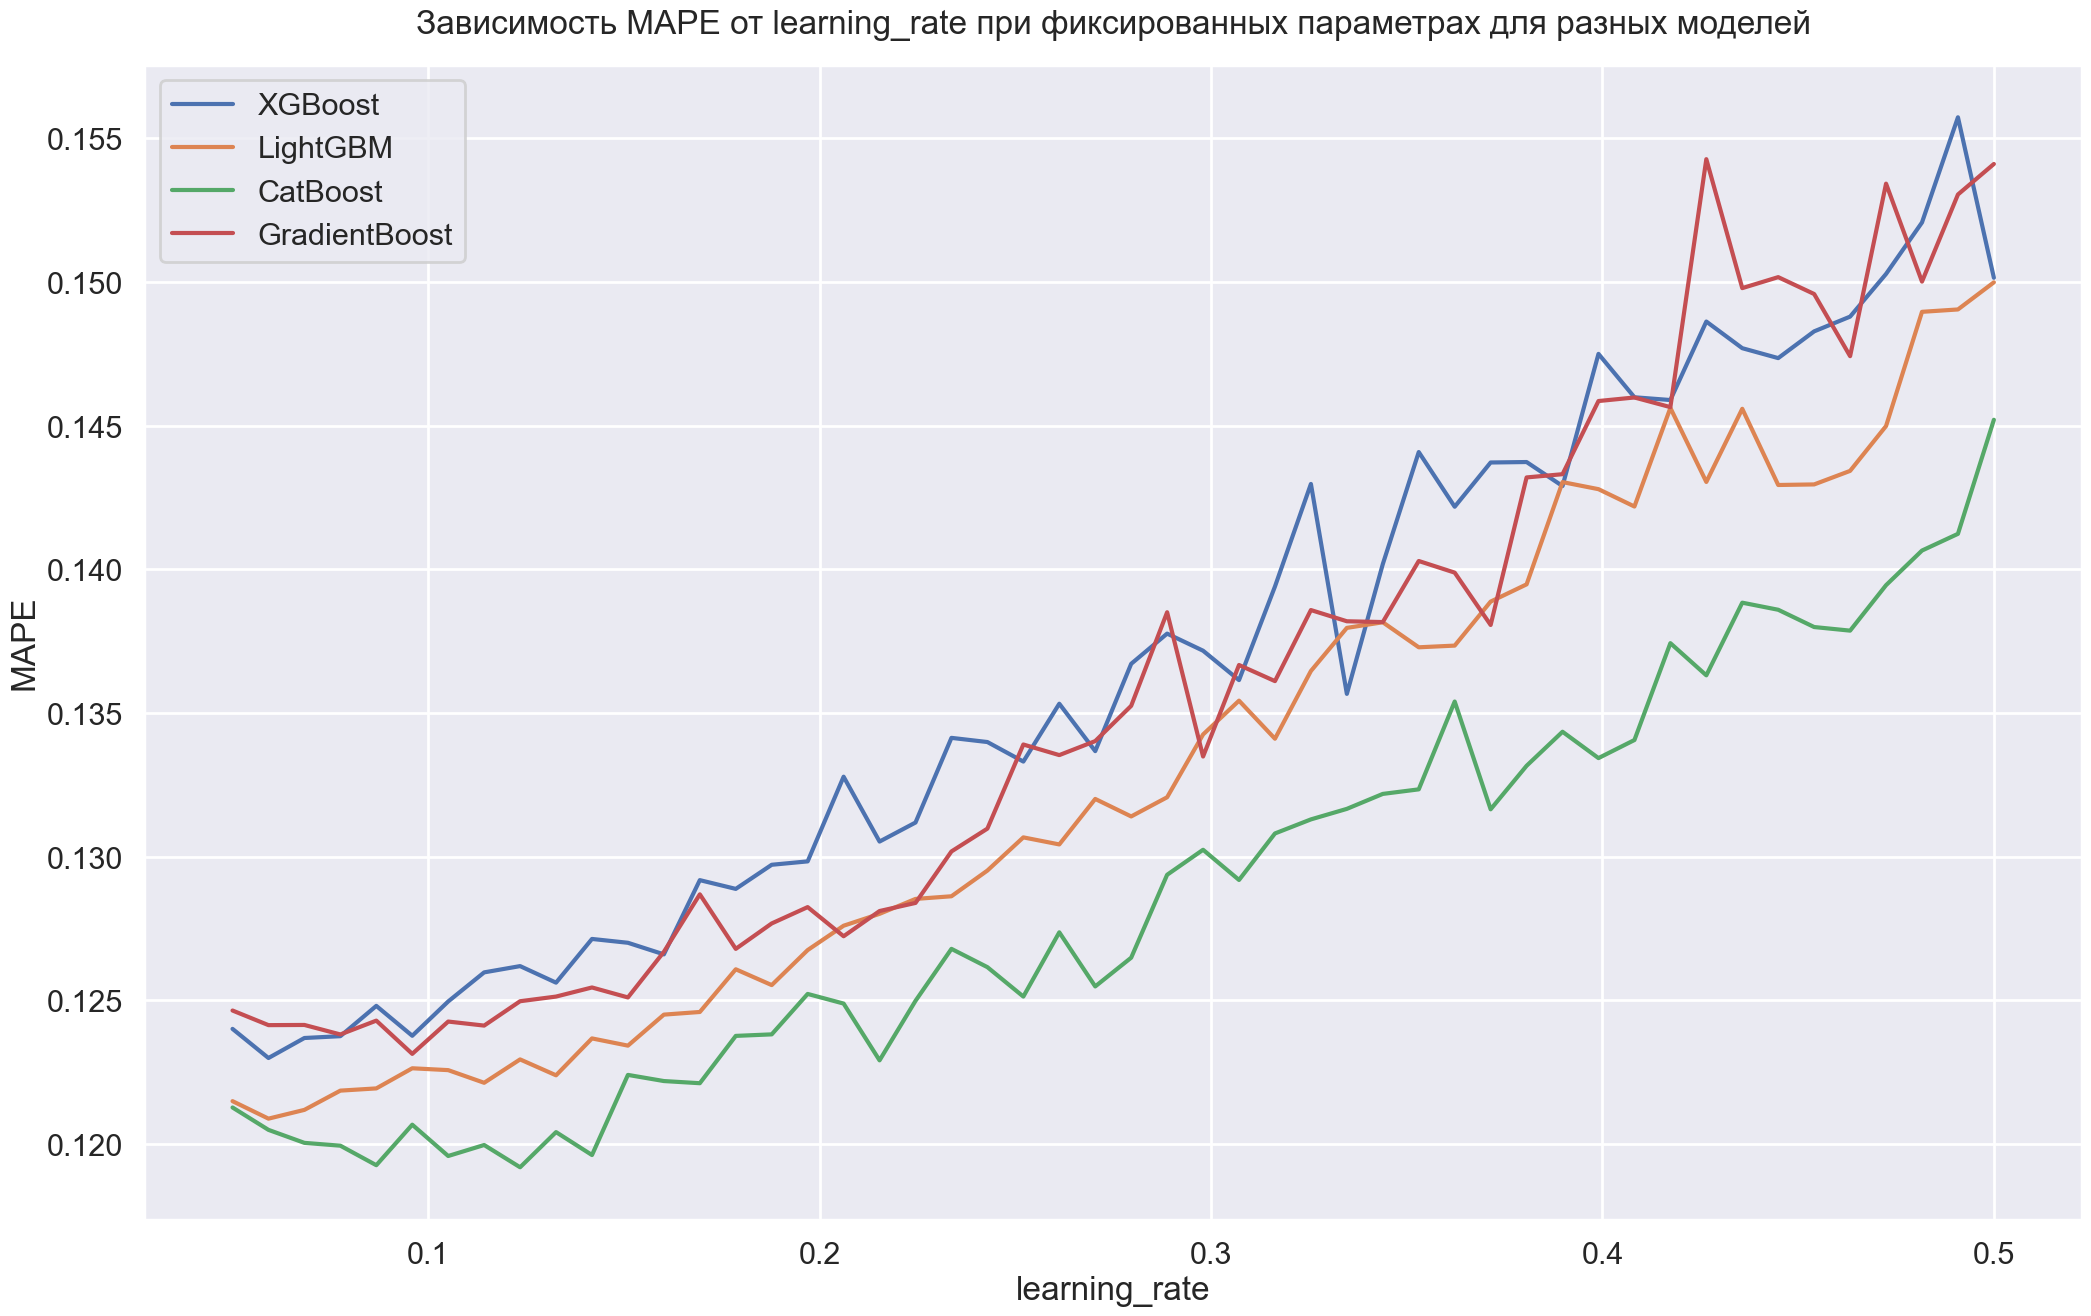

In [646]:
plt.figure(figsize=(25, 15))
sns.set(context='poster')

plt.plot(learning_rate_values, learning_rate_xgb, label='XGBoost')
plt.plot(learning_rate_values, learning_rate_lgbm, label='LightGBM')
plt.plot(learning_rate_values, learning_rate_cb, label='CatBoost')
plt.plot(learning_rate_values, learning_rate_gb, label='GradientBoost')

plt.xlabel('learning_rate')
plt.ylabel('MAPE')
plt.title('Зависимость MAPE от learning_rate при фиксированных параметрах для разных моделей', y=1.02)
plt.legend();

Здесь видим, что при увеличении learning_rate ошибка в целом возрастает. Наименьшую ошибку опять же наблюдаем у CatBoost.

In [751]:
l1_xgb = []
l1_lgbm = []
l1_values = np.sort(sps.expon(loc=0, scale=1).rvs(size=50))
for l1 in tqdm(l1_values):
    
    model_xgb = xgb.XGBRegressor(n_estimators=xgb_best_n_estimators, max_depth=xgb_best_max_depth, 
                                 reg_alpha=l1, reg_lambda=xgb_best_lambda,
                                 learning_rate=xgb_best_learning_rate, random_state=25)
    model_xgb.fit(X_train, y_train)
    
    model_lgbm = lgb.LGBMRegressor(n_estimators=lgbm_best_n_estimators, max_depth=lgbm_best_max_depth, 
                                 reg_alpha=l1, reg_lambda=lgbm_best_lambda,
                                 learning_rate=lgbm_best_learning_rate, random_state=25)
    model_lgbm.fit(X_train, y_train)
    
    l1_xgb.append(mean_absolute_percentage_error(y_test, model_xgb.predict(X_test)))
    l1_lgbm.append(mean_absolute_percentage_error(y_test, model_lgbm.predict(X_test)))

  0%|          | 0/50 [00:00<?, ?it/s]

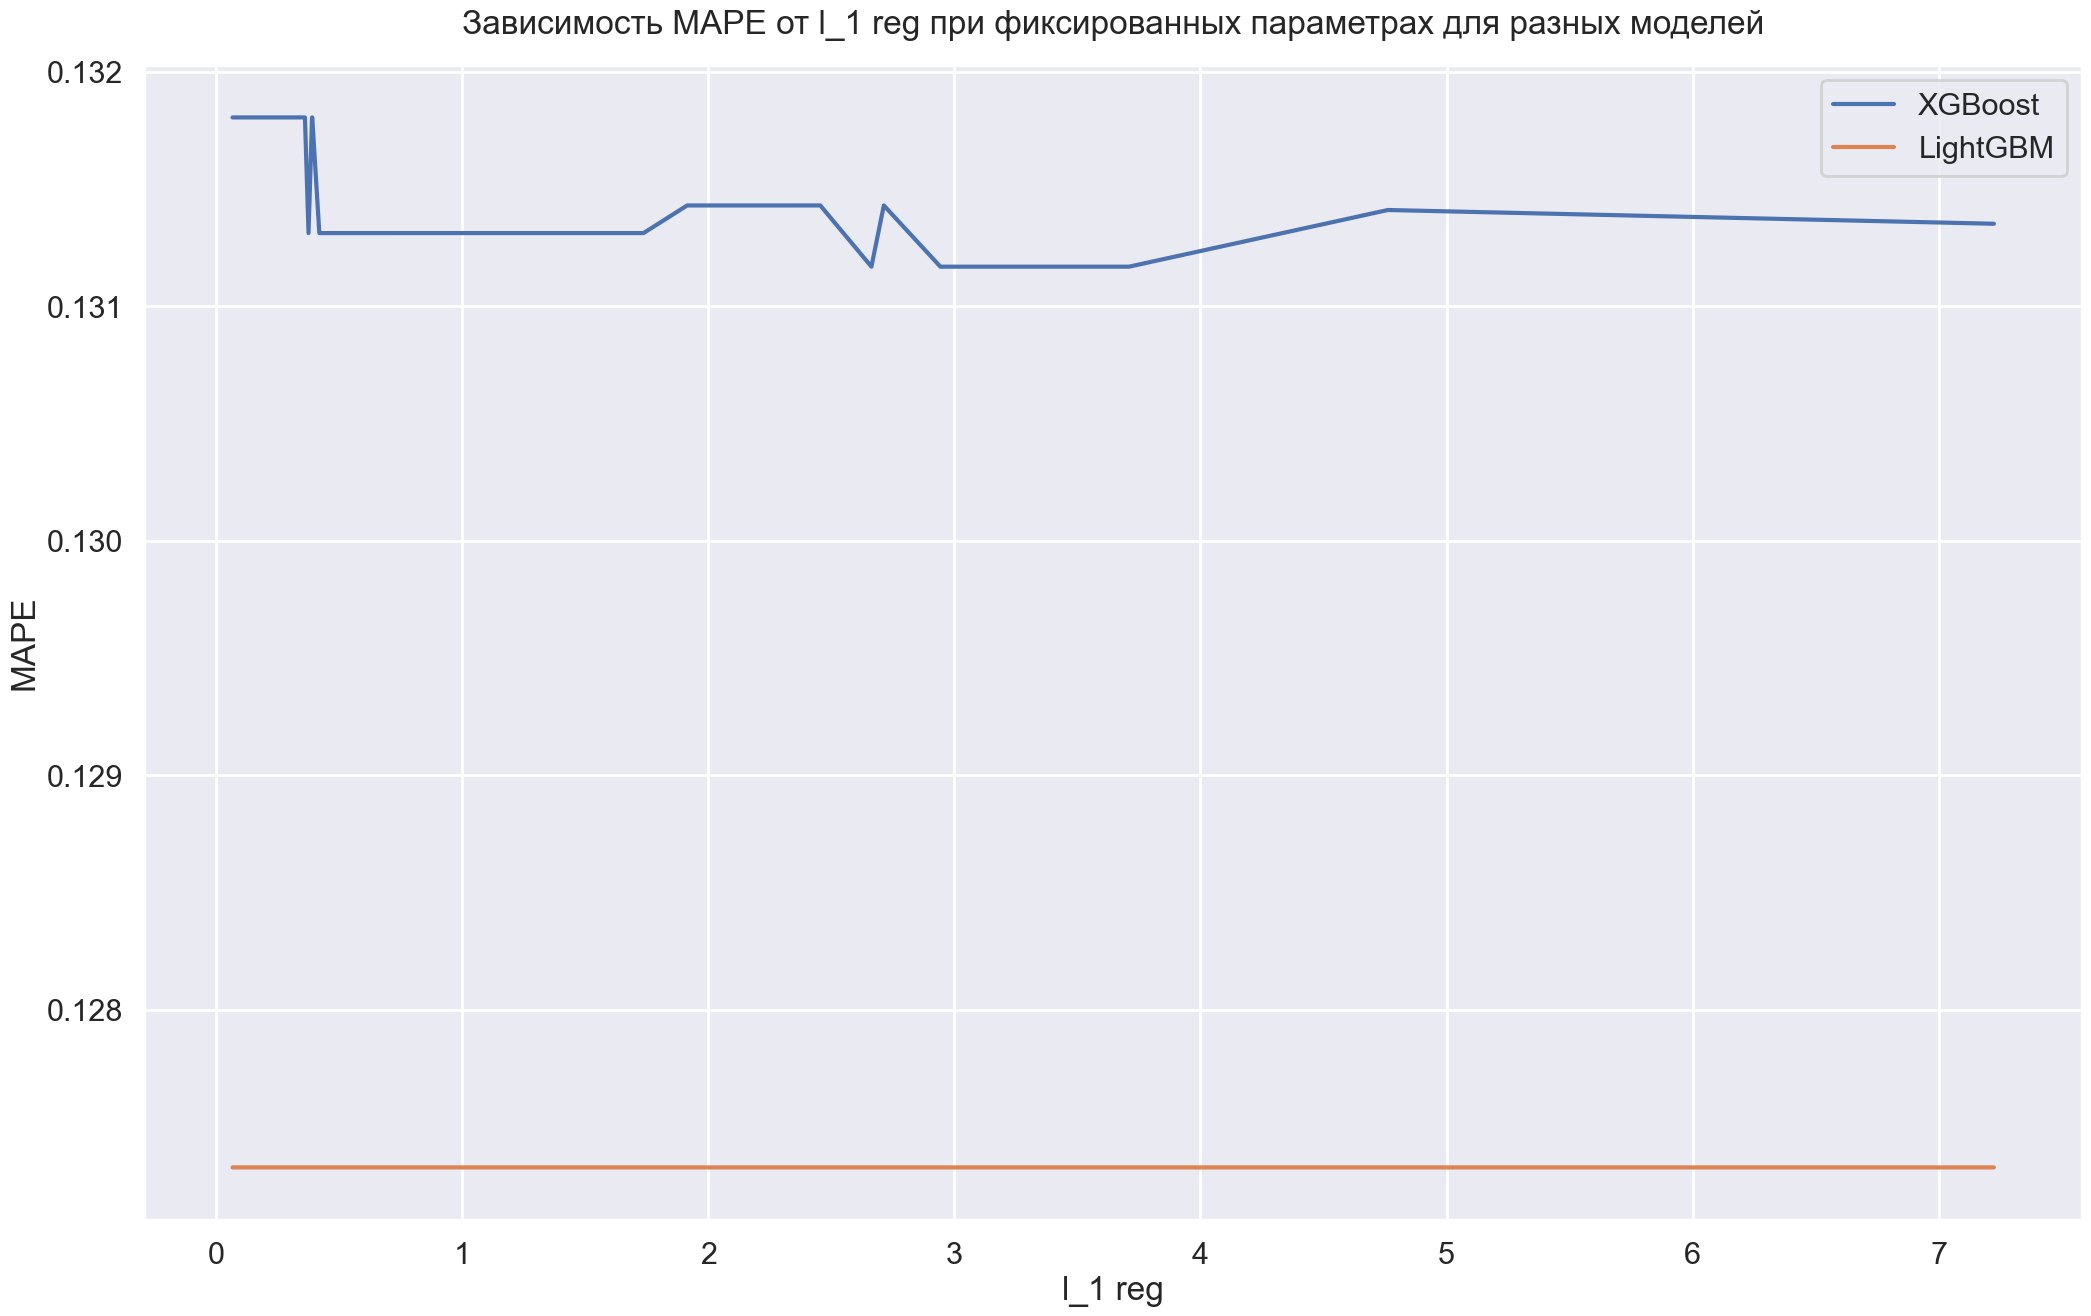

In [752]:
plt.figure(figsize=(25, 15))
sns.set(context='poster')

plt.plot(l1_values, l1_xgb, label='XGBoost')
plt.plot(l1_values, l1_lgbm, label='LightGBM')

plt.xlabel('l_1 reg')
plt.ylabel('MAPE')
plt.title('Зависимость MAPE от l_1 reg при фиксированных параметрах для разных моделей', y=1.02)
plt.legend();

На данном графике l1_reg у LightGBM оказался константой и причем она дает на немного, но меньшую ошибку, чем XGBoost.

In [753]:
l2_xgb = []
l2_lgbm = []
l2_cb = []
l2_values = np.sort(sps.expon(loc=0, scale=1).rvs(size=50))
for l2 in tqdm(l2_values):
    
    model_xgb = xgb.XGBRegressor(n_estimators=xgb_best_n_estimators, max_depth=xgb_best_max_depth, 
                                 reg_alpha=xgb_best_alpha, reg_lambda=l2,
                                 learning_rate=xgb_best_learning_rate, random_state=25)
    model_xgb.fit(X_train, y_train)
    
    model_lgbm = lgb.LGBMRegressor(n_estimators=lgbm_best_n_estimators, max_depth=lgbm_best_max_depth, 
                                 reg_alpha=lgbm_best_alpha, reg_lambda=l2,
                                 learning_rate=lgbm_best_learning_rate, random_state=25)
    model_lgbm.fit(X_train, y_train)
    
    model_cb = CatBoostRegressor(n_estimators=cb_best_n_estimators, max_depth=cb_best_max_depth, 
                                 l2_leaf_reg=l2, learning_rate=cb_best_learning_rate,
                                 random_state=25)
    model_cb.fit(X_train, y_train, verbose=False)
    
    l2_xgb.append(mean_absolute_percentage_error(y_test, model_xgb.predict(X_test)))
    l2_lgbm.append(mean_absolute_percentage_error(y_test, model_lgbm.predict(X_test)))
    l2_cb.append(mean_absolute_percentage_error(y_test, model_cb.predict(X_test)))

  0%|          | 0/50 [00:00<?, ?it/s]

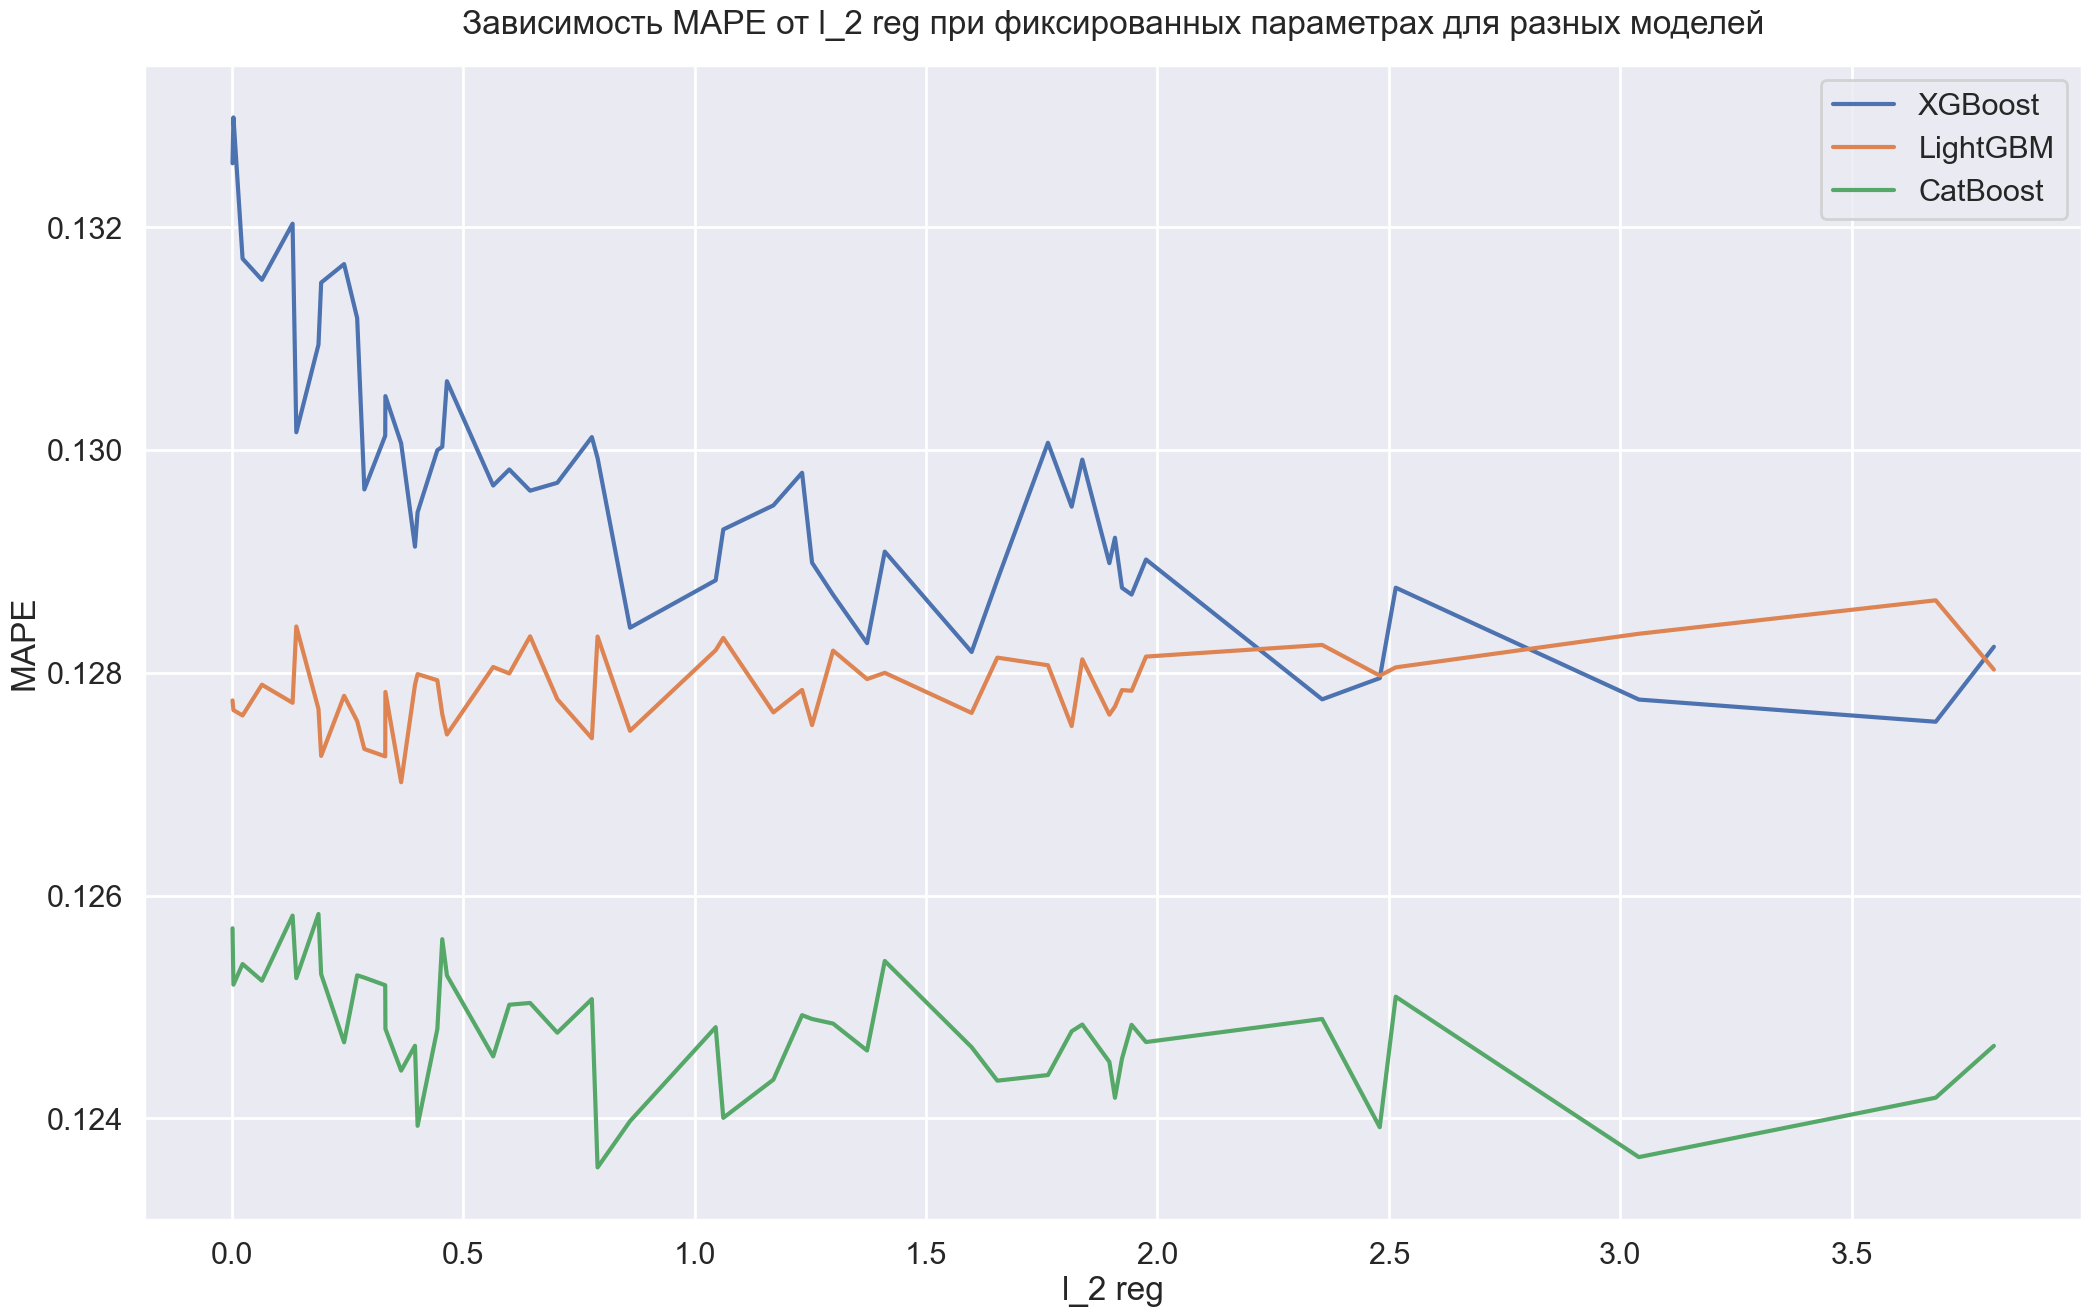

In [754]:
plt.figure(figsize=(25, 15))
sns.set(context='poster')

plt.plot(l2_values, l2_xgb, label='XGBoost')
plt.plot(l2_values, l2_lgbm, label='LightGBM')
plt.plot(l2_values, l2_cb, label='CatBoost')

plt.xlabel('l_2 reg')
plt.ylabel('MAPE')
plt.title('Зависимость MAPE от l_2 reg при фиксированных параметрах для разных моделей', y=1.02)
plt.legend();

In [755]:
print('Аргумент минимума CatBoost на графике:', l2_values[np.argmin(l2_cb)])

Аргумент минимума CatBoost на графике: 0.7902335944393458


На графике видно, что опять же CatBoost показывает наилучшую ошибку. При этом нельзя сказать о какой-то зависимости MAPE при увеличении learning_rate, так как ошибка сильно скачет.

In [719]:
n_est = 650

model_xgb = xgb.XGBRegressor(n_estimators=n_est, max_depth=xgb_best_max_depth, 
                                 reg_alpha=xgb_best_alpha, reg_lambda=xgb_best_lambda,
                                 learning_rate=xgb_best_learning_rate, random_state=25)
model_xgb.fit(X_train, y_train)

model_lgbm = lgb.LGBMRegressor(n_estimators=n_est, max_depth=lgbm_best_max_depth, 
                             reg_alpha=lgbm_best_alpha, reg_lambda=lgbm_best_lambda,
                             learning_rate=lgbm_best_learning_rate, random_state=25)
model_lgbm.fit(X_train, y_train)

model_cb = CatBoostRegressor(n_estimators=n_est, max_depth=cb_best_max_depth, 
                             l2_leaf_reg=cb_best_lambda, learning_rate=cb_best_learning_rate,
                             random_state=25)
model_cb.fit(X_train, y_train, verbose=False)

model_gb = GradientBoostingRegressor(n_estimators=n_est, max_depth=gb_best_max_depth, 
                             learning_rate=gb_best_learning_rate, random_state=25)
model_gb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.12227227227227228, max_depth=6,
                          n_estimators=650, random_state=25)

In [720]:
n_est_xgb = []
n_est_lgbm = []

for i in tqdm(range(1, n_est + 1)):
    n_est_xgb.append(mean_absolute_percentage_error(y_test, model_xgb.predict(X_test, iteration_range=(0, i))))
    n_est_lgbm.append(mean_absolute_percentage_error(y_test, model_lgbm.predict(X_test, num_iteration=i)))

  0%|          | 0/650 [00:00<?, ?it/s]

In [739]:
n_est_cb = list(map(lambda x: mean_absolute_percentage_error(y_test, x), model_cb.staged_predict(X_test)))
n_est_gb = list(map(lambda x: mean_absolute_percentage_error(y_test, x), model_gb.staged_predict(X_test)))

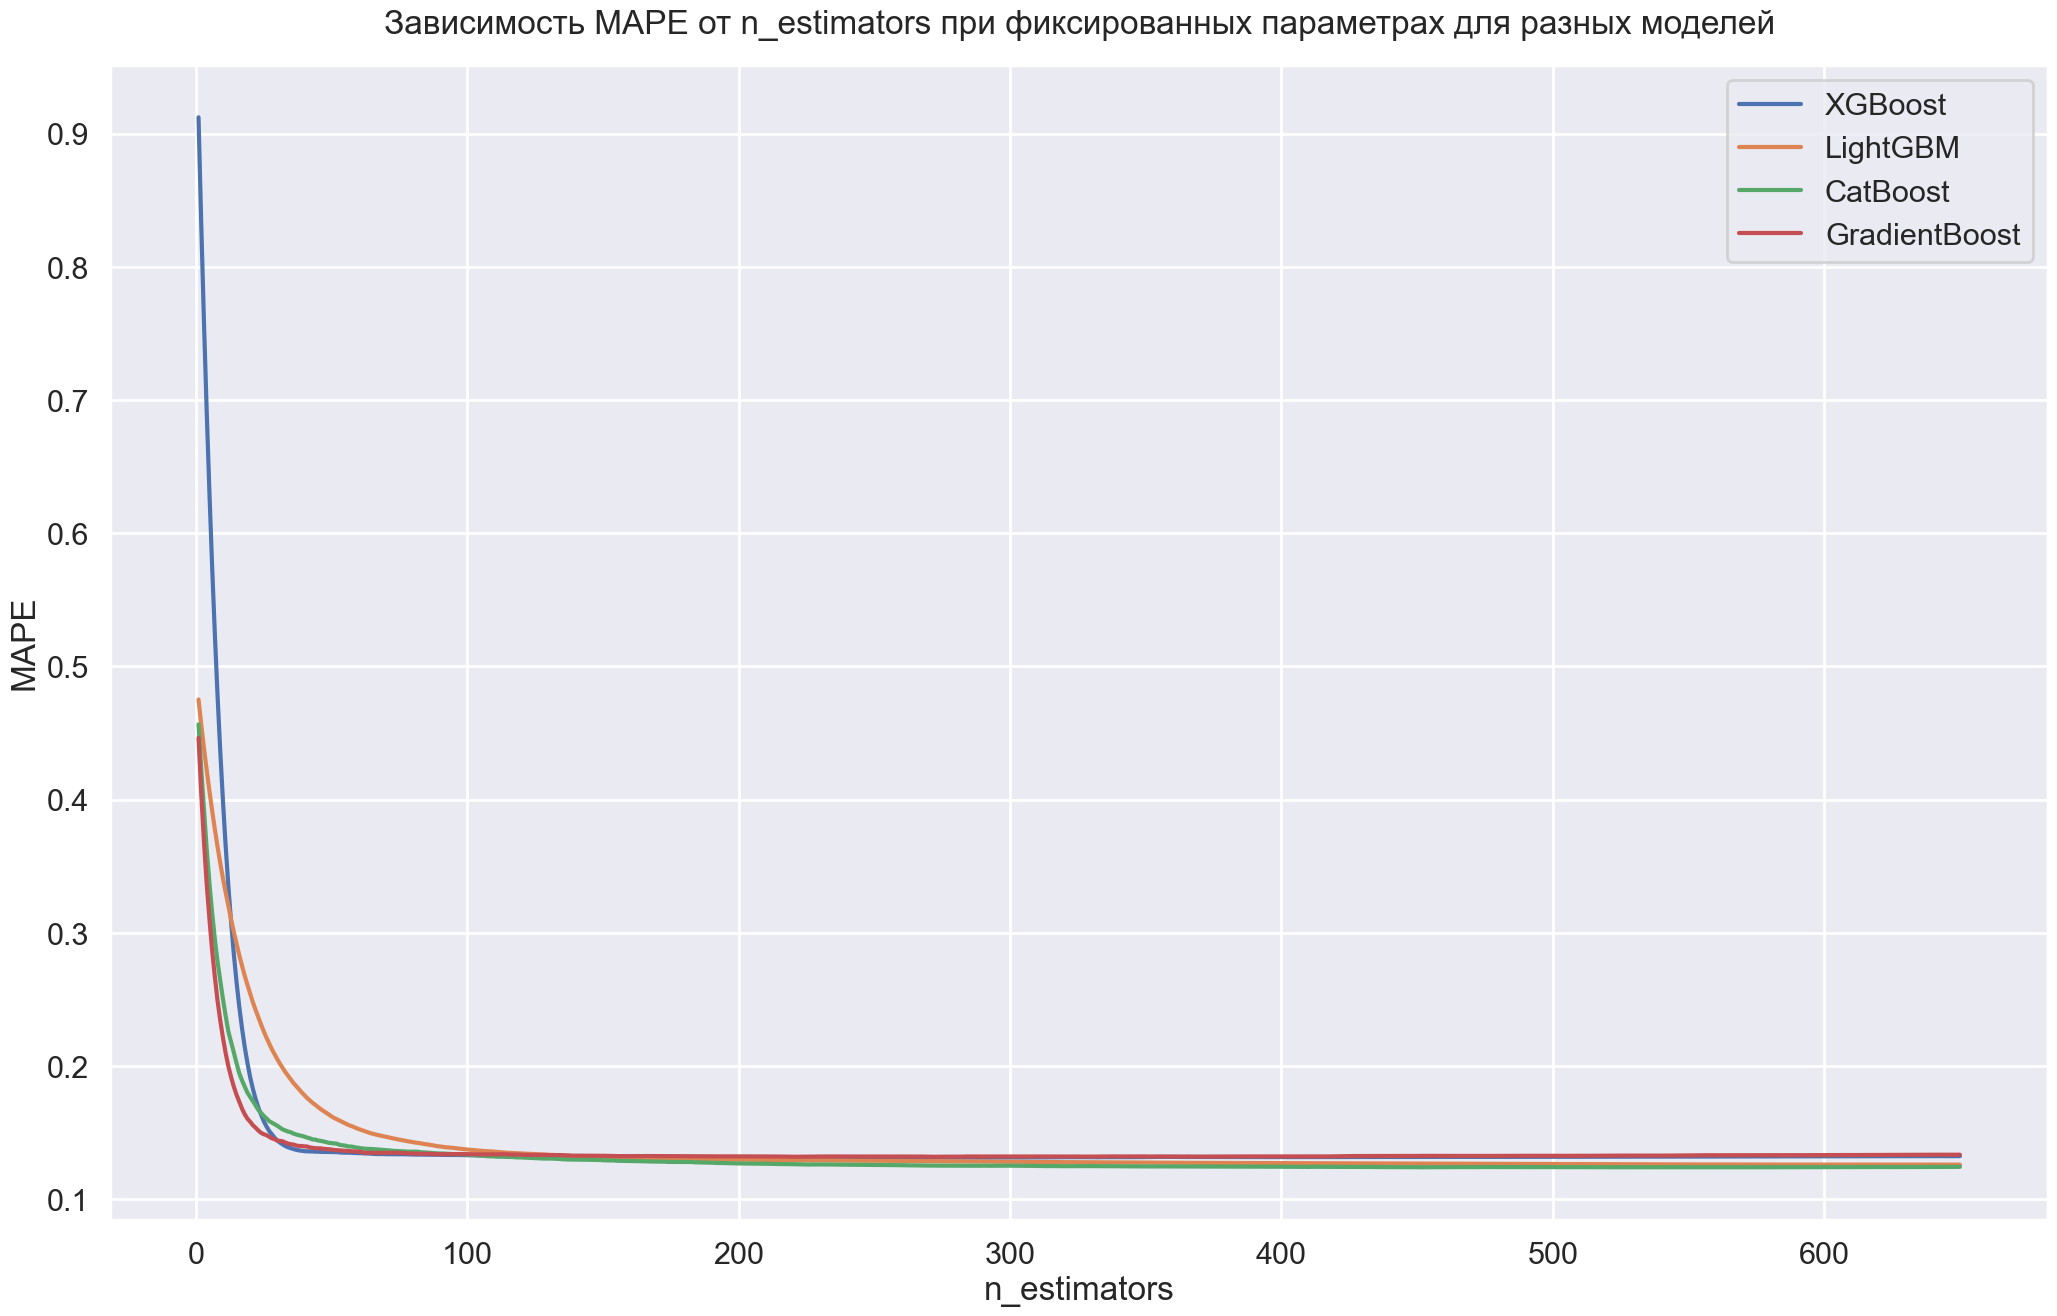

In [740]:
plt.figure(figsize=(25, 15))
sns.set(context='poster')

plt.plot(np.arange(n_est) + 1, n_est_xgb, label='XGBoost')
plt.plot(np.arange(n_est) + 1, n_est_lgbm, label='LightGBM')
plt.plot(np.arange(n_est) + 1, n_est_cb, label='CatBoost')
plt.plot(np.arange(n_est) + 1, n_est_gb, label='GradientBoost')

plt.xlabel('n_estimators')
plt.ylabel('MAPE')
plt.title('Зависимость MAPE от n_estimators при фиксированных параметрах для разных моделей', y=1.02)
plt.legend();

Ограничим ось по y, чтобы лучше увидеть зависимость.

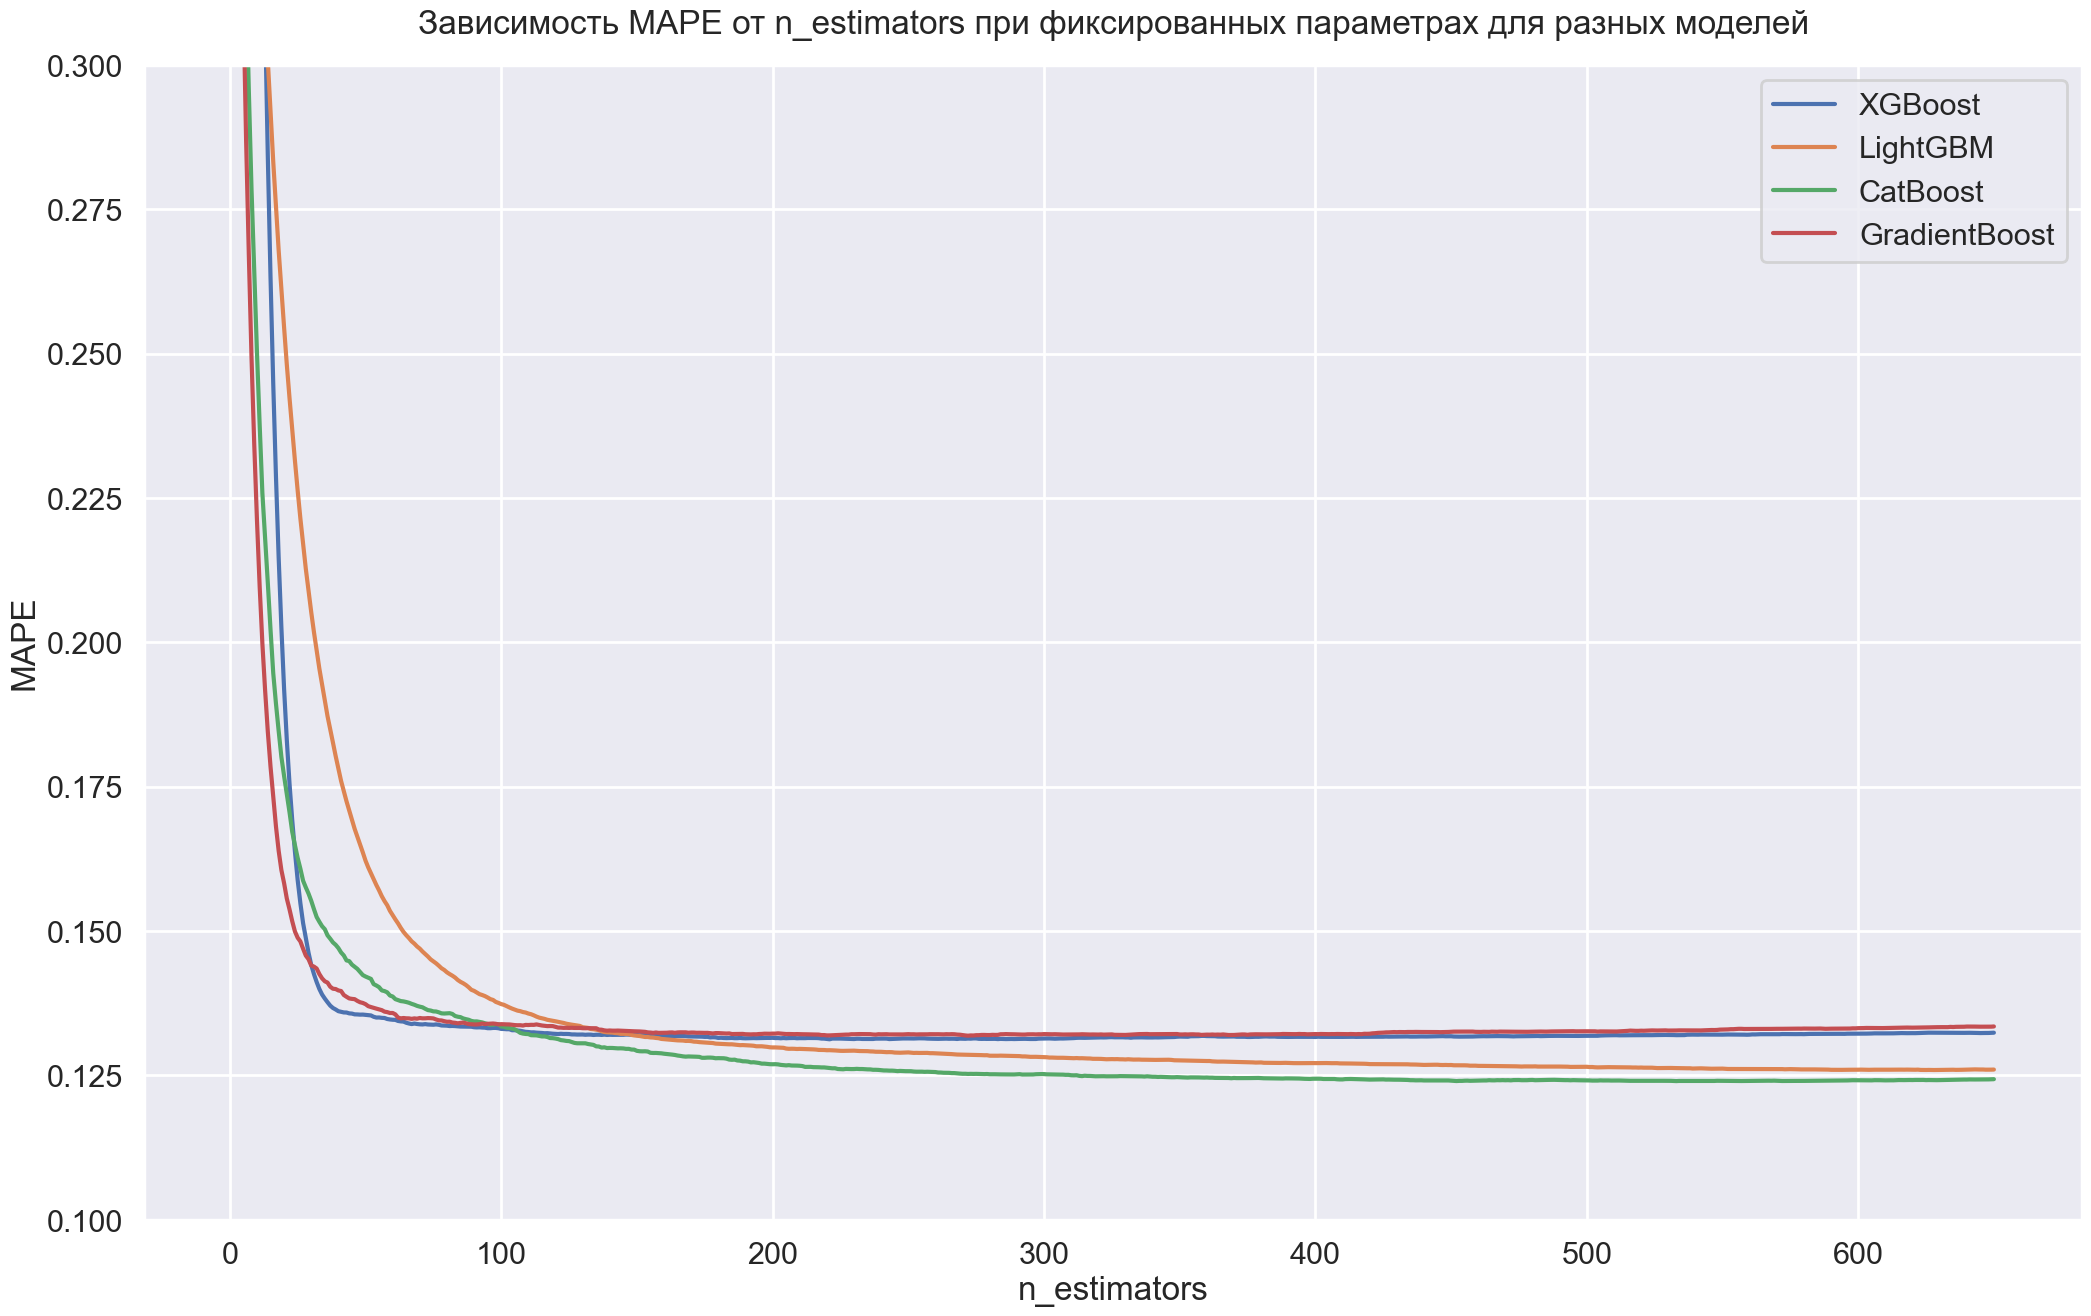

In [741]:
plt.figure(figsize=(25, 15))
sns.set(context='poster')

plt.plot(np.arange(n_est) + 1, n_est_xgb, label='XGBoost')
plt.plot(np.arange(n_est) + 1, n_est_lgbm, label='LightGBM')
plt.plot(np.arange(n_est) + 1, n_est_cb, label='CatBoost')
plt.plot(np.arange(n_est) + 1, n_est_gb, label='GradientBoost')

plt.xlabel('n_estimators')
plt.ylabel('MAPE')
plt.title('Зависимость MAPE от n_estimators при фиксированных параметрах для разных моделей', y=1.02)
plt.legend()
plt.ylim(0.1, 0.3);

Как и на графике с max_depth видно, что GradientBoost и XGBoost ведут себя очень похоже. При количестве деревьев меньше 100 CatBoost и LightGBM хуже чем те, но при глубине большей 100 - лучше. Лучше всего опять же показывает себя CatBoost.

**Вывод**: Сначала мы подобрали оптимальные гиперпараметры для каждой модели и увидели, что CatBoost показывает себя лучше всего. Затем при анализе графиков также стало ясно, что в данной задаче в среднем наилучшую ошибку показывает CatBoost.

### Задача 3

В продолжении исследований из предыдущей задачи выберите некоторое количество хороших на ваш взгляд моделей, постройте для них предсказание на тестовой выборке. Полученные предсказания отправьте в тренировочное соревнование на Kaggle.

Ссылка: https://www.kaggle.com/competitions/ds-2022-autumn/overview

Инвайт: https://www.kaggle.com/t/cc114f8334c54504997045ddd6036313

**Правила**

* В Kaggle в данное тренировочное соревнование можно отправлять не более 7 решений в день (8-ю система не позволит).
* Решения индивидуальные.
* Качество считается по метрике MAPE.
* До окончания соревнования доступны значения качества, посчитанные только на случайных 30% тестовых данных. Значения отображаются в Public Leaderboard
* После окончания соревнования становится доступным Private Leaderboard, в котором значения качества посчитанны на оставшихся 70% объектов.
* Для включения в Private Leaderboard можно выбрать две посылки.
* В Leaderboard должны отображаться ваши реальные имя и фамилия. В противном случае решение может быть не зачтено.
* Все файлы, которые вы отправляете в соревнование, видны организаторам соревнования. Файлы должны иметь понятное имя, при отправке файла в систему необходимо написать краткое описание решения.
* В решении, отправляемом боту, должно быть отображено, результаты каких моделей вы отправляете в соревнование.
* Пользоваться можно любыми пройденными в наших курсах моделями.
* Код студентов, занявших первые 3 места, будет запускаться. Также выборочно может запускаться код и остальных студентов
* Не забывайте сделать пояснения к своему решению.

**Советы**

* Чтобы получить действительно хороший результат подбора гиперпараметров мало, попробуйте ввести новые признаки для улучшения качества решения.
* Некоторые инсайты по тому, какие признаки могут улучшить качество, можно получить если провести разведывательный анализ данных (EDA). Например, может иметь смысл изучить датасет на предмет наличия выбросов, исследовать пространственное и временное распределение отклика. 

**Бонусы**

* Выдаются только при соблюдении всех правил и суммируются.
* 10 баллов — ваше решение лучше sample_submission.csv на Private Leaderboard.
* 10 баллов — ваше решение имеет ошибку не более 12.3% по метрике MAPE на Private Leaderboard.
* 1 конфета — попадание в топ-10 на Private Leaderboard.
* 1 средняя конфета — попадание в топ-3 на Private Leaderboard.
* 1 большая конфета — попадание в топ-1 на Private Leaderboard.

Возьмем модель CatBoost и подберем параметры на основе полученной сетки и графиков. На основе полученной ошибки здесь также поподбираем параметры в окрестности полученных значений.

In [850]:
res_model_cb = CatBoostRegressor(n_estimators=650, max_depth=8, learning_rate=0.109, 
                                    l2_leaf_reg=0.79, one_hot_max_size=2, random_strength=1, random_state=25)
res_model_cb.fit(X_train, y_train, verbose=False, cat_features=['zipcode'])

In [851]:
print('MAPE на test:', mean_absolute_percentage_error(y_test, res_model_cb.predict(X_test)))

MAPE на test: 0.12010144667559369


In [770]:
answers = res_model_cb.predict(X_test_start)
data_answers_1 = pd.DataFrame(np.arange(1, 7001), columns=['index'])
data_answers_1['price'] = answers
data_answers_1

,index,price
0,1,2.598526e+05
1,2,9.165054e+05
2,3,1.801380e+05
3,4,4.568116e+05
4,5,2.879382e+05
...,...,...
6995,6996,5.960703e+05
6996,6997,7.798177e+05
6997,6998,5.867028e+05
6998,6999,1.095332e+06


In [771]:
data_answers_1.to_csv('submission_cb_3.csv', index=False)

In [841]:
data_train = pd.read_csv('houses_train.csv', parse_dates=[1])
data_test = pd.read_csv('houses_test.csv', parse_dates=[1])

In [842]:
data_train['month'] = data_train['date'].apply(lambda x: x.month)
data_test['month'] = data_test['date'].apply(lambda x: x.month)

In [843]:
data_train['date'] = data_train['date'].apply(lambda x: x.year)
data_test['date'] = data_test['date'].apply(lambda x: x.year)

In [844]:
data_train['timef_built'] = data_train['date'] - data_train['yr_built']

data_train['yr_renovated'] = list(map(lambda x: data_train['yr_built'][x] if data_train['yr_renovated'][x] == 0 \
                                      else data_train['yr_renovated'][x], np.arange(0, len(data_train['date']))))
data_train['timef_renovated'] = data_train['date'] - data_train['yr_renovated']

In [845]:
data_test['timef_built'] = data_test['date'] - data_test['yr_built']

data_test['yr_renovated'] = list(map(lambda x: data_test['yr_built'][x] if data_test['yr_renovated'][x] == 0 \
                                      else data_test['yr_renovated'][x], np.arange(0, len(data_test['date']))))
data_test['timef_renovated'] = data_test['date'] - data_test['yr_renovated']

In [846]:
train_names = ['timef_built', 'timef_renovated', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
            'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'zipcode']
test_name = 'price'

In [847]:
X_train, X_test, y_train, y_test = train_test_split(data_train[train_names], data_train[test_name],
                                                    test_size=0.25, random_state=45)

Модель с такими параметрами дала наилучший результат из всех которые я получил.